#                                       **Data Wrangling Project**

In [628]:
#Importing all packages that we will use:

import pandas as pd
import requests
import os
import time
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Won't do the scrapping part cause i don't have a Twitter account. I will use the tweet_json.txt.


In [629]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# I have checked twitter_api.py.

# Gathering Data

## Gathering tweet_json.txt:

In [630]:
# Now open tweet_json.txt and store in a new list: 
with open('tweet_json.txt') as file:
    data = json.load(file)
    
new_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    new_list.append({'tweet_id': tweet_id,
                        'rt': retweets,
                        'fav': favorites})
    
tweets_database = pd.DataFrame(new_list, columns = ['tweet_id', 'rt', 'fav'])




In [631]:
#Showing shape and first rows:
print(tweets_database.shape)
tweets_database.head()

(2329, 3)


,tweet_id,rt,fav
0,892420643555336193,7727,36304
1,892177421306343426,5719,31303
2,891815181378084864,3785,23577
3,891689557279858688,7888,39616
4,891327558926688256,8508,37820


## Gathering image_predictions.tsv:

In [632]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    
r = requests.get(url, allow_redirects=True)

open('image-predictions.tsv', 'wb').write(r.content)

335079

In [633]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

#Showing shape and first rows:
print(image_predictions.shape)
image_predictions.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Gathering twitter-archive-enhanced.csv:

In [634]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#Showing shape and first rows:
print(twitter_archive_enhanced.shape)
twitter_archive_enhanced.head()

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


# Assessing Data:

## printing head, tail and info of tweets_databes(tweet_json.txt):


In [635]:
tweets_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2329 non-null   object
 1   rt        2329 non-null   int64 
 2   fav       2329 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [636]:
tweets_database.tail()

,tweet_id,rt,fav
2324,666049248165822465,40,96
2325,666044226329800704,132,272
2326,666033412701032449,41,112
2327,666029285002620928,42,121
2328,666020888022790149,463,2421


In [637]:
tweets_database.head()

,tweet_id,rt,fav
0,892420643555336193,7727,36304
1,892177421306343426,5719,31303
2,891815181378084864,3785,23577
3,891689557279858688,7888,39616
4,891327558926688256,8508,37820


In [638]:
#Want to see if there's any duplicate tweets in tweets_database:

tweets_database[tweets_database.tweet_id.duplicated() == True]

,tweet_id,rt,fav


#### as shown above, when theres no data in the columns, there are no duplicate tweets.

## printing head, tail and info of twitter_archive_enhanced:

In [639]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [640]:
twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [641]:
twitter_archive_enhanced.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

### Checking if there's duplicates in twitter_archive_enhanced for tweet_id:

In [642]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## printing head, tail and info of image_predictions:

In [643]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [644]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [645]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Checking if there's duplicates in image_predictions for twitter_id:

In [646]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### This shows us that the tweets we have are unique for the 3 databases.

# Cleaning Issues:

## 1) Want to see if there are duplicated retweets now in twitter_archive_enhanced:

In [647]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [648]:
twitter_archive_enhanced.retweeted_status_id.value_counts().count()

181

### As we can see, there are 181 retweets i want to drop from this database.

## 2) Now i want to see if there's inconsistency in dogs names:

In [649]:
twitter_archive_enhanced.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Daisy        7
Buddy        7
Bailey       7
Toby         7
an           7
Stanley      6
Rusty        6
Name: name, dtype: int64

### As we can see, there are 745 values as "None", 55 values as "a", 7 values as "an" and 8 values as "the"

## 3) Now i wanna check the rating denominator in twitter_archive_enhanced:

In [650]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### As we can see, the denominator in some cases is not 10, so, these should be removed.

## 4) Now i want to check if there are the same ratings in the text in one random tweet compared to the rating numerator:

In [651]:
pd.options.display.max_colwidth = 280

In [652]:
twitter_archive_enhanced.text[twitter_archive_enhanced.tweet_id == 883482846933004288]


45    This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Name: text, dtype: object

In [653]:
twitter_archive_enhanced.rating_numerator[twitter_archive_enhanced.tweet_id == 883482846933004288]


45    5
Name: rating_numerator, dtype: int64

### Here i can see that there are inconcistencies in this variable too, so, we need to change it.

## 5) I want to check if the retweeted_status_timestamp and timestamp has the datetime type:


In [654]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### As we can see, both are  type "object" when it should be type "datetime"

### Quality Problems for image_predictions:

## 6) Wrong predictions in some cases:

In [655]:
print(image_predictions.p1.value_counts(30))
print(image_predictions.p2.value_counts(30))
print(image_predictions.p3.value_counts(30))


golden_retriever      0.072289
Labrador_retriever    0.048193
Pembroke              0.042892
Chihuahua             0.040000
pug                   0.027470
                        ...   
trombone              0.000482
traffic_light         0.000482
standard_schnauzer    0.000482
china_cabinet         0.000482
swab                  0.000482
Name: p1, Length: 378, dtype: float64
Labrador_retriever      0.050120
golden_retriever        0.044337
Cardigan                0.035181
Chihuahua               0.021205
Pomeranian              0.020241
                          ...   
affenpinscher           0.000482
umbrella                0.000482
Bernese_mountain_dog    0.000482
china_cabinet           0.000482
goose                   0.000482
Name: p2, Length: 405, dtype: float64
Labrador_retriever    0.038072
Chihuahua             0.027952
golden_retriever      0.023133
Eskimo_dog            0.018313
kelpie                0.016867
                        ...   
bullfrog              0.000482
sho

### we can see that there are values that not correspond to a dog breed such as shower_cap and hand-held_computer  so we should discard them.

## 7) Checking p1,p2,p3 variables again:

In [656]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
trombone                1
traffic_light           1
standard_schnauzer      1
china_cabinet           1
swab                    1
Name: p1, Length: 378, dtype: int64

In [657]:
image_predictions.p2.value_counts()


Labrador_retriever      104
golden_retriever         92
Cardigan                 73
Chihuahua                44
Pomeranian               42
                       ... 
affenpinscher             1
umbrella                  1
Bernese_mountain_dog      1
china_cabinet             1
goose                     1
Name: p2, Length: 405, dtype: int64

In [658]:
image_predictions.p3.value_counts()


Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
bullfrog               1
shower_cap             1
African_chameleon      1
hand-held_computer     1
beach_wagon            1
Name: p3, Length: 408, dtype: int64

### This shows us that there are problems with capitalization. Some of the breeds starts with capital letter and some don't. Also, the three cols. are not type string.

## 8) Image_predictions shows us that cols p1, p2 and p3 have some inconsistencies in the use of - or _ . This happens for example in row 2070 for p3: "German_short-haired_pointer"

In [659]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Tidiness problems:

## 1) I've noticed that doggo, floofer, puppo and pupper are all in 4 different columns when they should be in one because they are a categorization:

In [660]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2) Tweet_id variable is not the same type in the three databases, so if we are going to concat the three databases we need to have this variable in the same unique type for the 3 of them:

In [661]:
twitter_archive_enhanced.info()
image_predictions.info()
tweets_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### As we can see here,  the twitter_archive_enhanced and in the image_predictions database the type for tweet_id is "int64" when it should be "object" as in the tweets_database. 

# Cleaning all the issues mentioned before:

####  as suggested, i will make a copy of my databases:

In [662]:
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()
image_predictions_copy = image_predictions.copy()
tweets_database_copy = tweets_database.copy()

### 1) Removing retweets:

#### Define: remove retweets. Remove rows when retweets are not null.

#### Code:

In [663]:
#Check initial number of rows:
print(twitter_archive_enhanced_copy.shape[0])

twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[twitter_archive_enhanced_copy['retweeted_status_id'].isnull()]

2356


#### Test:

In [664]:
#check which amount of tweets are not retweets:

print(str(twitter_archive_enhanced_copy.shape[0]))

2175


In [665]:
#let me check if in this column we still have null values: 

twitter_archive_enhanced_copy['retweeted_status_id'].value_counts()


Series([], Name: retweeted_status_id, dtype: int64)

### 2) Remove the inconsistency in dog names: 

#### define: We want to see whats in that column 

In [666]:
twitter_archive_enhanced_copy.name.value_counts()

None          680
a              55
Charlie        11
Lucy           11
Oliver         10
             ... 
Hercules        1
light           1
Brandonald      1
Marlee          1
Tyrus           1
Name: name, Length: 956, dtype: int64

As seen previously, there are various inconsistency errors so we are gonna drop that column because im not gonna use it for my analysis


#### Code:

In [667]:
twitter_archive__enhanced_copy = twitter_archive_enhanced_copy.drop(columns='name')

#### Test:

In [668]:
#Checking the columns to see that names are removed:

twitter_archive_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 3) Denominator problem

#### Define: Deleting rows where denominator is not 10. We will also change it to "float" type in order to have decimals. 

#### Code: 

In [669]:
twitter_archive_enhanced_copy = twitter_archive_enhanced_copy[twitter_archive_enhanced_copy["rating_denominator"] == 10]

#### Test:

In [670]:
twitter_archive_enhanced_copy.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

In [671]:
##### ALL VALUES TO "FLOAT"


twitter_archive_enhanced_copy['rating_denominator'] = twitter_archive_enhanced_copy['rating_denominator'].astype('float')

In [672]:
twitter_archive_enhanced_copy.rating_denominator.value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

### 4) The numerator problem:

#### Define:  Some numerators have inconsistent values. We should change them.

#### Code:

In [673]:
twitter_archive_enhanced_copy["rating_numerator"].value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [674]:
text = twitter_archive_enhanced_copy["text"]
accurate_rating = [] #Empty list

for x in text: #for every line in text where a decimal numerator matches, return this:
    decimal=re.search('(\d+\.\d+)\/\d+', x)
    integer=re.search('(\d+)\/\d+', x)
    if decimal!=None:
        accurate_rating.append(float(decimal.group(1))) #When decimal numerator found, append this to the new ratings numertors list
    else:
        accurate_rating.append(float(integer.group(1))) #if there're no decimals, only append the integer numbers:

# Replacing the column
twitter_archive_enhanced_copy["rating_numerator"] = accurate_rating


#### Test:

In [675]:
twitter_archive_enhanced_copy["rating_numerator"].value_counts()

12.00      500
10.00      442
11.00      425
13.00      307
9.00       155
8.00        98
7.00        53
14.00       43
5.00        34
6.00        32
3.00        19
4.00        15
2.00         9
1.00         7
0.00         2
420.00       2
1776.00      1
9.50         1
15.00        1
11.26        1
11.27        1
17.00        1
13.50        1
666.00       1
9.75         1
182.00       1
Name: rating_numerator, dtype: int64

In [676]:
#### ALL VALUES TO FLOAT:

twitter_archive_enhanced_copy['rating_numerator'] = twitter_archive_enhanced_copy['rating_numerator'].astype('float')

### 5) Change the "retweeted_status_timestamp" and "timestamp" to the correct datetime type:

#### Define: See what type is that column: 

In [677]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2153 non-null   int64  
 1   in_reply_to_status_id       73 non-null     float64
 2   in_reply_to_user_id         73 non-null     float64
 3   timestamp                   2153 non-null   object 
 4   source                      2153 non-null   object 
 5   text                        2153 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2099 non-null   object 
 10  rating_numerator            2153 non-null   float64
 11  rating_denominator          2153 non-null   float64
 12  name                        2153 non-null   object 
 13  doggo                       2153 

#### Code: changing it to the correct one

In [678]:
twitter_archive_enhanced_copy.retweeted_status_timestamp = pd.to_datetime(twitter_archive_enhanced_copy.retweeted_status_timestamp)
twitter_archive_enhanced_copy.timestamp = pd.to_datetime(twitter_archive_enhanced_copy.timestamp)



#### Test: check data type is correct

In [679]:
twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2153 non-null   datetime64[ns, UTC]
 4   source                      2153 non-null   object             
 5   text                        2153 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 9   expanded_urls               2099 non-null   object             
 10  rating_numerator            2153 non-null   float64         

## 6) Wrong predictions in image_predictions

#### Define: Some predictions are not dog breeds such as shower_cap  or hand-held_computer:

#### Code: this will remove the rows without breeds pred.

In [680]:
images_clean = image_predictions_copy.drop(image_predictions_copy[(image_predictions_copy.p1_dog == False) & (image_predictions_copy.p2_dog == False) & (image_predictions_copy.p3_dog == False)].index)

#### Test: printing how much rows it eliminated:


In [681]:
print((image_predictions_copy.shape[0] - images_clean.shape[0]))

324


## 7) Images_predictions database problem of capitalization:

#### Define: p1,p2,p3 have problems of capitalization. We will make them lowercase and date type: string


#### Code: 

In [682]:
images_clean['p1'] = images_clean['p1'].str.lower()

images_clean['p2'] = images_clean['p2'].str.lower()

images_clean['p3'] = images_clean['p3'].str.lower()


#### Test:  

In [683]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## 8) Image_predictions inconsistencies in the use of - or _ and wrong data type


#### Define: Change data type and replace - with _

#### Code:

In [684]:
images_clean['p1'] = images_clean.p1.str.replace('-','_')

images_clean['p2'] = images_clean.p2.str.replace('-','_')

images_clean['p3'] = images_clean.p3.str.replace('-','_')

#### Test: 

In [685]:
images_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft_coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True


## Tidiness problems

## 1) 4 different columns (doggo, floofer, puppo, pupper) when they should be in one because they are a categorization:

#### Define: Merge dog categorization  in 1 column

#### Code: Check first if there are Nones.

In [686]:
print(twitter_archive_enhanced.doggo.value_counts())
print(twitter_archive_enhanced.pupper.value_counts())
print(twitter_archive_enhanced.puppo.value_counts())
print(twitter_archive_enhanced.floofer.value_counts())


None     2259
doggo      97
Name: doggo, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64


#### Code 2: Change the None values to empty str:

In [687]:
twitter_archive_enhanced_copy["doggo"] = twitter_archive_enhanced_copy.doggo.str.replace('None','')
twitter_archive_enhanced_copy["pupper"] = twitter_archive_enhanced_copy.pupper.str.replace('None','')
twitter_archive_enhanced_copy["puppo"] = twitter_archive_enhanced_copy.puppo.str.replace('None','')
twitter_archive_enhanced_copy["floofer"] = twitter_archive_enhanced_copy.floofer.str.replace('None','')

#### Code 3: Concat all cols in 1:

In [688]:
twitter_archive_enhanced_copy['stage'] = twitter_archive_enhanced_copy.doggo + twitter_archive_enhanced_copy.floofer + twitter_archive_enhanced_copy.pupper + twitter_archive_enhanced_copy.puppo


In [689]:
twitter_archive_enhanced_copy.stage.value_counts()

                1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

#### Code 4: Separate those names that are together with a comma:

In [690]:
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_enhanced_copy.loc[twitter_archive_enhanced_copy.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test: 

In [691]:
twitter_archive_enhanced_copy.stage.value_counts()

                  1809
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

## 2) Tweet_id variable is not the same type in the three databases, so if we are going to concat the three databases we need to have this variable in the same unique type for the 3 of them:

#### define: change tweet_id from image_predictions_copy and twitter_archive_enhanced_copy to type object:

In [692]:
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')
twitter_archive_enhanced_copy['tweet_id'] = twitter_archive_enhanced_copy['tweet_id'].astype('str')

In [693]:
images_clean.info()
twitter_archive_enhanced_copy.info()
tweets_database_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                

## Merging all 3 databases together:

In [694]:
Merging_1 = twitter_archive_enhanced_copy.merge(images_clean, on="tweet_id")


In [695]:
Master_dataset = Merging_1.merge(tweets_database_copy, on="tweet_id")

In [696]:
Master_dataset.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rt,fav
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5719,31303
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3785,23577
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7888,39616
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaT,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,8508,37820
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,2851,19049


## Dropping columns we re not going to use: 

In [697]:
# im dropping the columns i wont use. In the case of predictions, i will stay only with p1 for the analysis. Thats the reason why i drop the others.


Master_dataset = Master_dataset.drop(['in_reply_to_user_id' ,'retweeted_status_user_id' ,'retweeted_status_timestamp' ,'retweeted_status_id' ,'in_reply_to_status_id' , 'expanded_urls' ,'jpg_url' ,'img_num' ,'puppo' ,'doggo' ,'pupper' ,'floofer', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1) 

In [698]:
Master_dataset.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,p1,p1_conf,p1_dog,rt,fav
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,,chihuahua,0.323581,True,5719,31303
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,,chihuahua,0.716012,True,3785,23577
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,,paper_towel,0.170278,False,7888,39616
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,,basset,0.555712,True,8508,37820
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,None,,chesapeake_bay_retriever,0.425595,True,2851,19049


# Storing and Acting on Wrangled Data



## Storing:

In [699]:
Master_dataset.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


## Analize:

In [700]:
Analize_dataset = pd.read_csv("twitter_archive_master.csv")

In [701]:
print(Analize_dataset.info())
print(Analize_dataset.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1661 non-null   int64  
 1   timestamp           1661 non-null   object 
 2   source              1661 non-null   object 
 3   text                1661 non-null   object 
 4   rating_numerator    1661 non-null   float64
 5   rating_denominator  1661 non-null   float64
 6   name                1661 non-null   object 
 7   stage               259 non-null    object 
 8   p1                  1661 non-null   object 
 9   p1_conf             1661 non-null   float64
 10  p1_dog              1661 non-null   bool   
 11  rt                  1661 non-null   int64  
 12  fav                 1661 non-null   int64  
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 157.5+ KB
None
(1661, 13)


In [702]:
Analize_dataset.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,p1,p1_conf,p1_dog,rt,fav
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,chihuahua,0.323581,True,5719,31303
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,chihuahua,0.716012,True,3785,23577
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,paper_towel,0.170278,False,7888,39616
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,basset,0.555712,True,8508,37820
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0,None,NaN,chesapeake_bay_retriever,0.425595,True,2851,19049


### 1) We will see the distribution of ratings:

I will take only in consideration the numerator cause the denominator is always 10. 

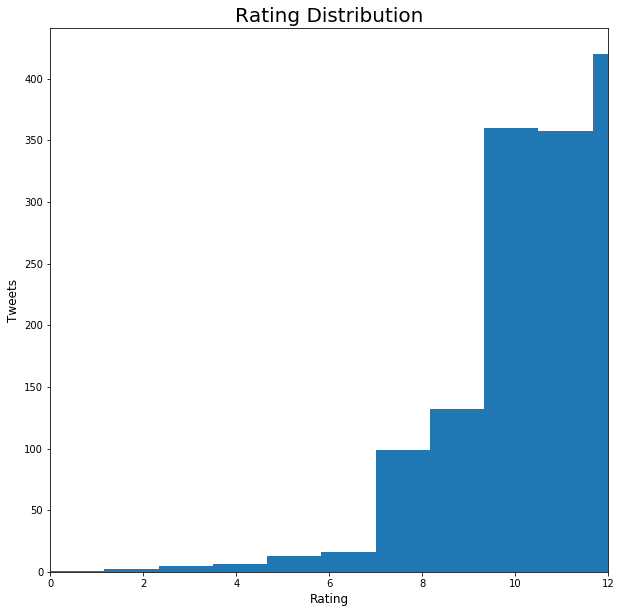

In [703]:
plt.rcParams['figure.figsize'] = (10,10)
Analize_dataset['rating_numerator'].plot(kind = 'hist', bins = 12)

plt.xlim(0, 12)
plt.ylabel('Tweets', fontsize = 12)
plt.xlabel('Rating', fontsize = 12)
plt.title('Rating Distribution', fontsize = 20)
plt.show();

Most of the tweets have ratings between 10-12. The graph above shows us that the distribution is left-skewed.

In [704]:
Analize_dataset.stage.value_counts()

pupper            168
doggo              53
puppo              21
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

### 2) Analyze the correlation between fav and rt

Text(0, 0.5, 'Favorite Count')

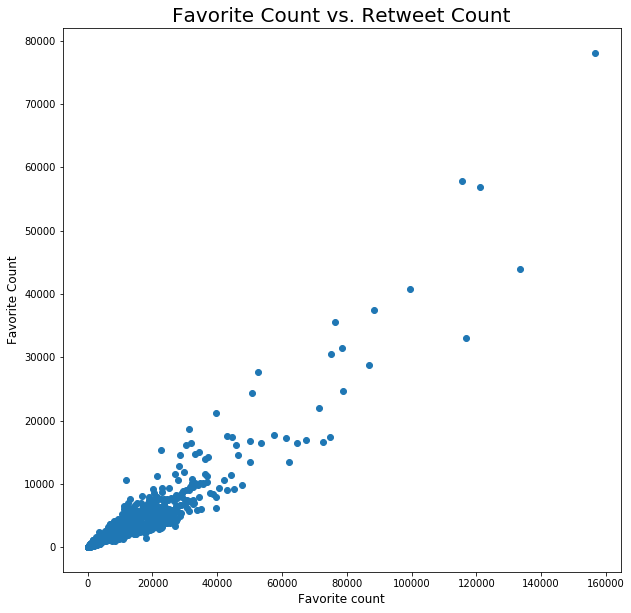

In [705]:
plt.rcParams['figure.figsize'] = (10,10)
plt.scatter(Analize_dataset['fav'], Analize_dataset['rt'])

plt.title('Favorite Count vs. Retweet Count', fontsize = 20)
plt.xlabel('Favorite count', fontsize = 12)
plt.ylabel('Favorite Count', fontsize = 12)

This plot shows us that there's a strong correlation between Favorite and Retweet count. This has its own logic because if you retweet a tweet, means you like it, so, there is a big chance that you mark it as favorite (and vice versa)

### 3) Analyze dog classification vs rating_num

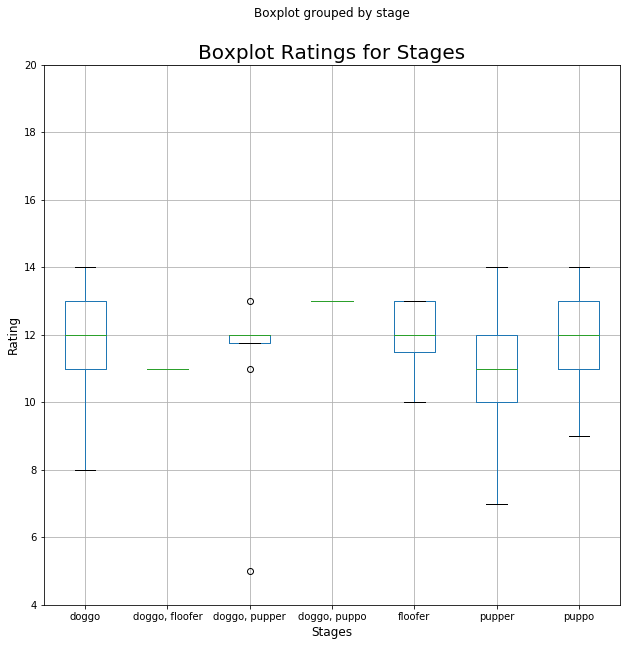

In [706]:
plt.rcParams['figure.figsize'] = (10,10)
Analize_dataset[pd.notnull(Analize_dataset['stage'])].boxplot(column = ['rating_numerator'], by = ['stage'])


plt.ylim((4,20))


plt.title('Boxplot Ratings for Stages', fontsize = 20)
plt.xlabel('Stages', fontsize = 12)
plt.ylabel('Rating', fontsize = 12);


This boxplot shows that puppo and doggo has better ratings than the other categorizations. 

### 4)  Analyze dog classification vs favorite 

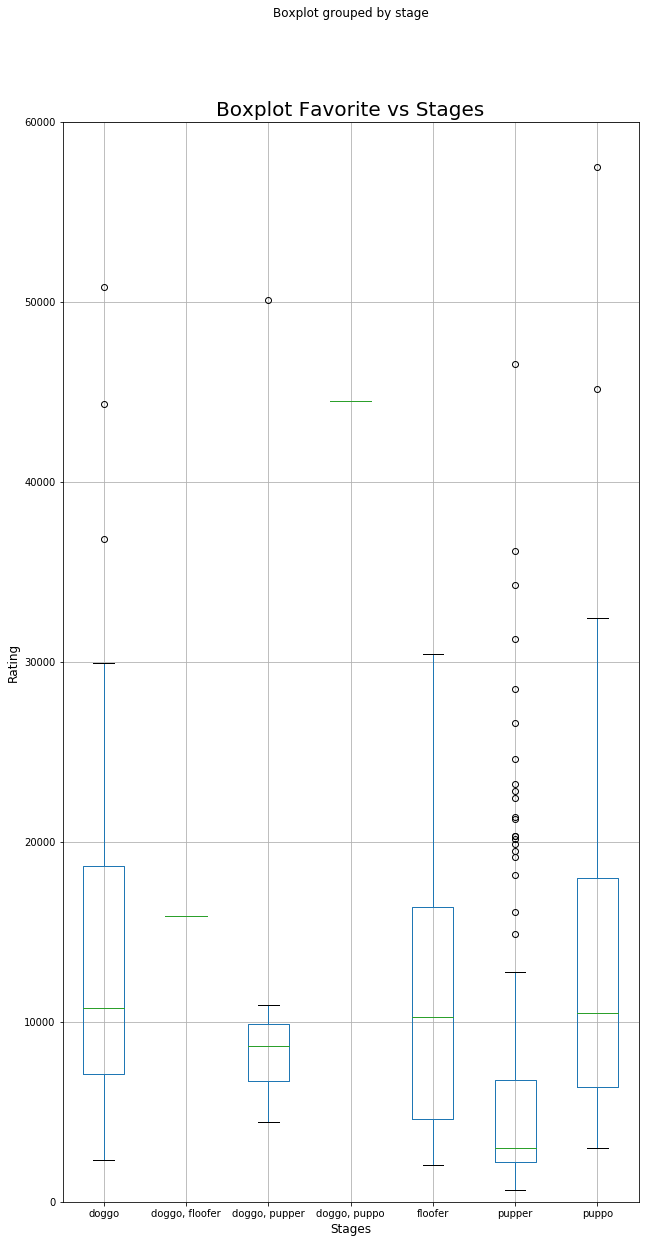

In [707]:
plt.rcParams['figure.figsize'] = (10,20)
Analize_dataset[pd.notnull(Analize_dataset['stage'])].boxplot(column = ['fav'], by = ['stage'])
plt.ylim(0,60000)

plt.title('Boxplot Favorite vs Stages', fontsize = 20)
plt.xlabel('Stages', fontsize = 12)
plt.ylabel('Rating', fontsize = 12);


This shows that "puppo" recieves more favorites than the other classifications

### 5) Most common dog breed prediction:

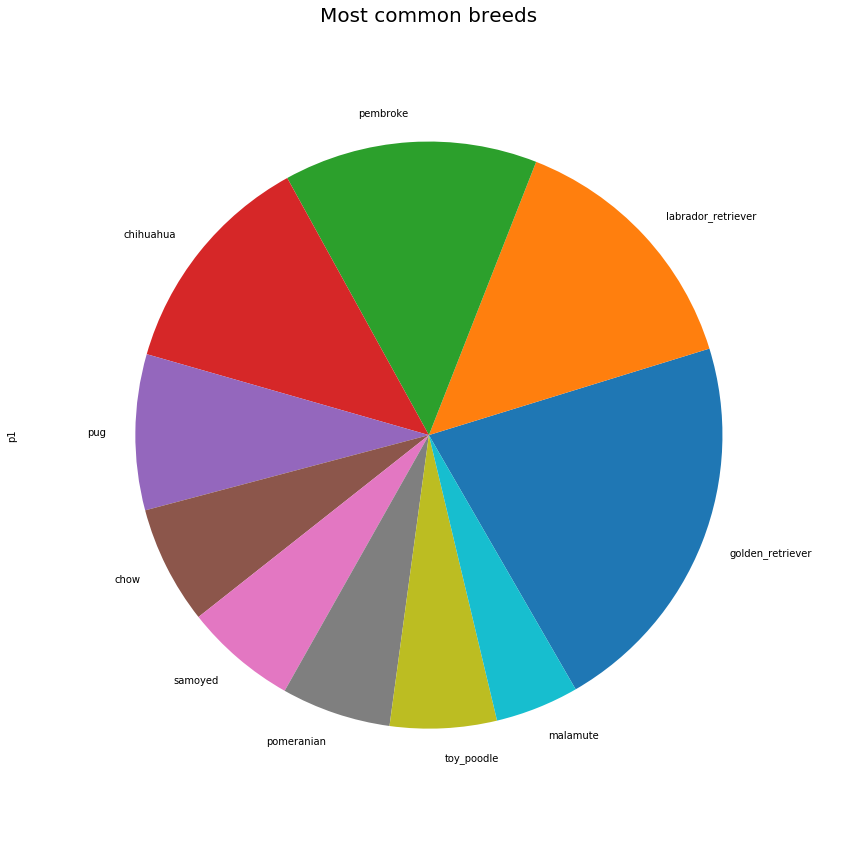

In [708]:
plt.rcParams['figure.figsize'] = (15,15)

Analize_dataset.p1.value_counts().head(10).plot.pie(startangle=300, pctdistance=0.9, radius = 0.9)
plt.title('Most common breeds', fontsize = 20)
plt.show();

As we can see above, Golden Retriever is the most common breed. 